In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

accident = pd.read_csv('accident.csv', sep =";")
accident.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,survived
1,69,Female,46.0,No,Yes,survived
2,46,Male,46.0,Yes,Yes,not_survived
3,32,Male,117.0,No,Yes,not_survived
4,60,Female,40.0,Yes,Yes,not_survived


In [5]:
df = accident.copy()

In [6]:

df.shape

(200, 6)

In [7]:
df.dtypes.value_counts()

object     4
int64      1
float64    1
Name: count, dtype: int64

In [8]:
(df.isna().sum()/df.shape[0]).sort_values(ascending = True)

Age                0.000
Helmet_Used        0.000
Seatbelt_Used      0.000
Survived           0.000
Gender             0.005
Speed_of_Impact    0.015
dtype: float64

In [9]:
df['Survived'].value_counts()

Survived
survived        101
not_survived     99
Name: count, dtype: int64

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_4648\856215336.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


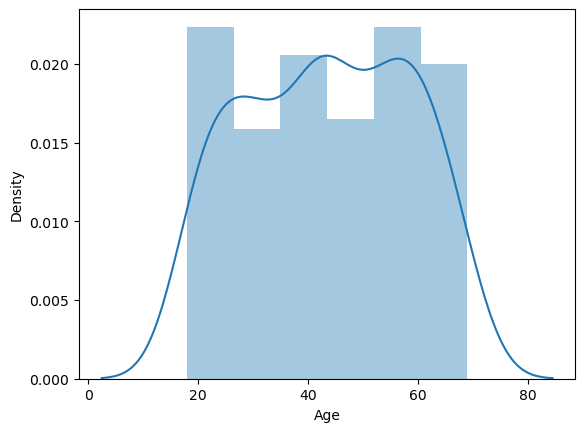

In [10]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])
    

In [11]:
for col in df.select_dtypes('object'):
    print(f'{col:-<50} {df[col].unique()}')

Gender-------------------------------------------- ['Female' 'Male' nan]
Helmet_Used--------------------------------------- ['No' 'Yes']
Seatbelt_Used------------------------------------- ['No' 'Yes']
Survived------------------------------------------ ['survived' 'not_survived']


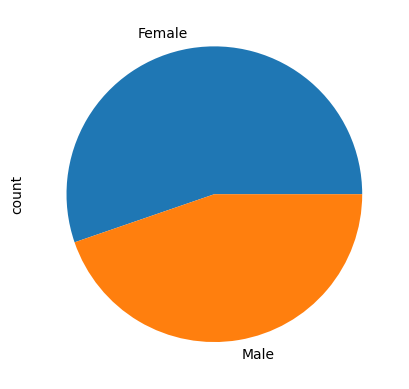

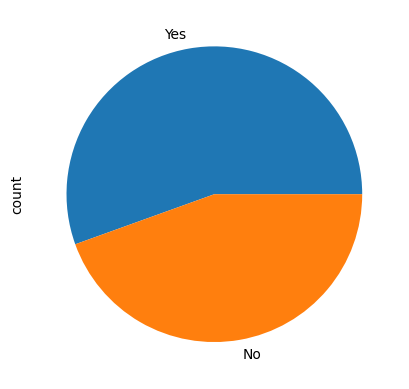

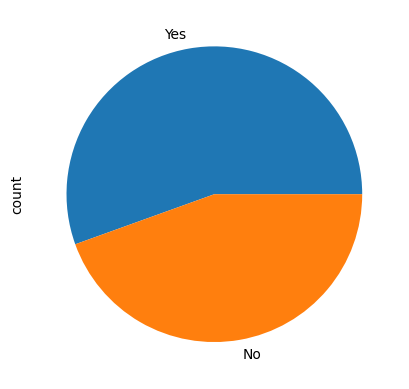

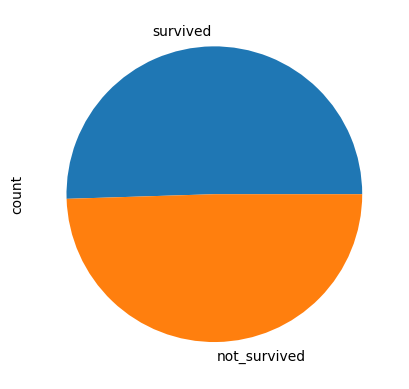

In [12]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.show()

# Relations variables/ target

# creation de sous ensembles

In [13]:
survived = df[df['Survived'] == 'survived']
not_survived = df[df['Survived'] == 'not_survived']

C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_4648\1288812705.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived[col], label = 'survived')
C:\Users\DELL LATITUDE\AppData\Local\Temp\ipykernel_4648\1288812705.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_survived[col], la

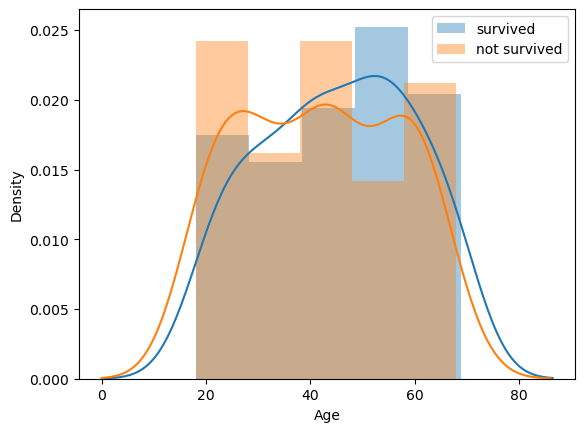

In [14]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.distplot(survived[col], label = 'survived')
    sns.distplot(not_survived[col], label = 'not survived')
    plt.legend()
    plt.show()

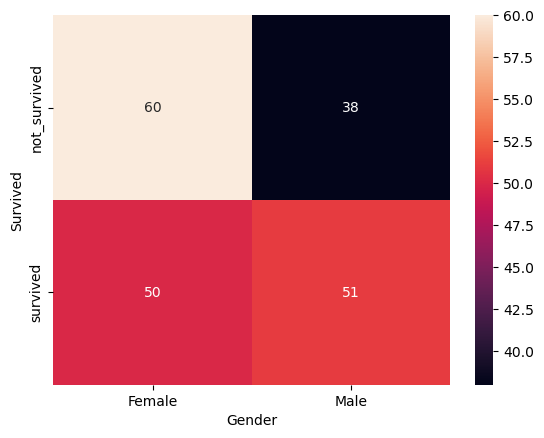

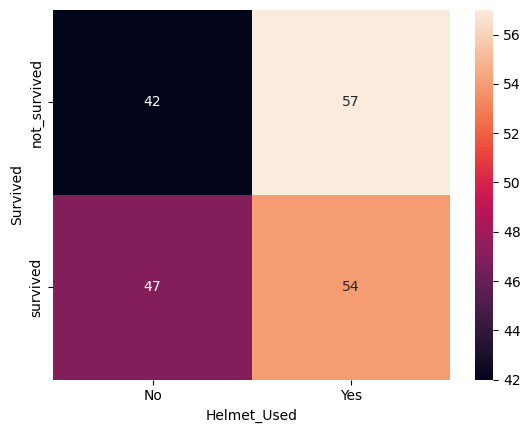

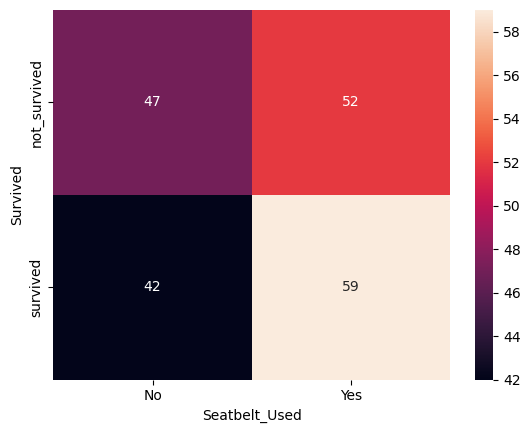

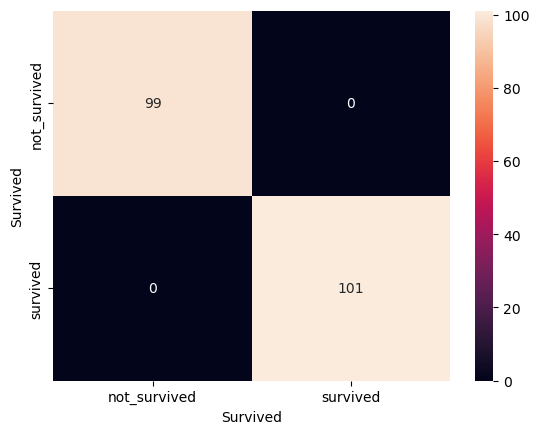

In [15]:
for col in df.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(df['Survived'], df[col]), annot = True, fmt = 'd')

# relation variable / variable

<Axes: >

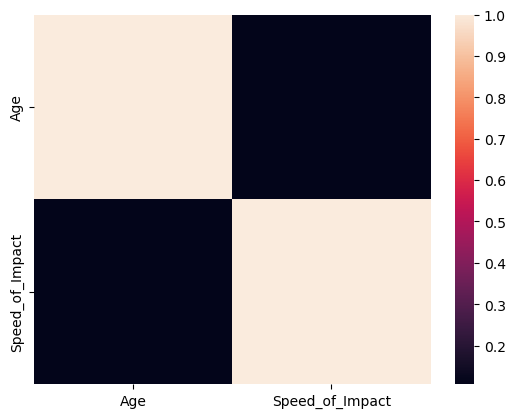

In [16]:
sns.heatmap(df.select_dtypes(exclude = 'object').corr())

C:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

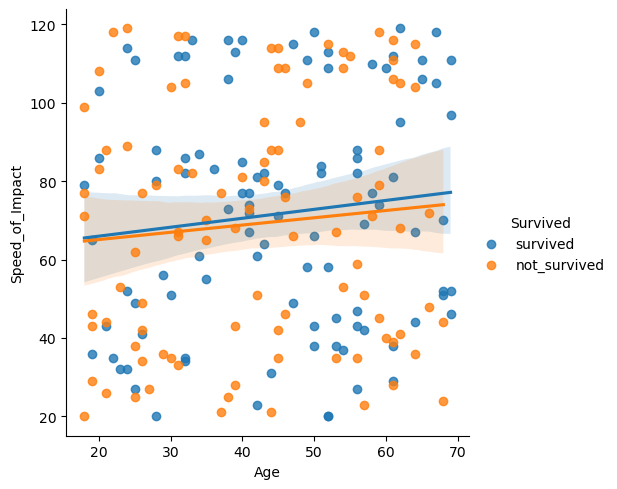

In [17]:
for col in df.select_dtypes(exclude = ['object', 'int']):
    plt.figure()
    sns.lmplot(x = 'Age', y =col,
               hue = 'Survived', data = df)

In [18]:
from scipy.stats import ttest_ind

In [19]:
survived.shape

(101, 6)

In [20]:
not_survived.shape

(99, 6)

In [21]:
balanced_sample = survived.sample(not_survived.shape[0])

In [22]:
def t_test(col):
    alpha = 0.05
    stat, p = ttest_ind(balanced_sample.dropna(),
                        not_survived.dropna())
    if p<alpha:
        return 'H0 rejette'
    else:
        return 0

# preprocessing
## TrainTest- Nettoyage-Encodage

In [23]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size = 0.2, random_state = 0)

In [24]:
testset['Survived'].value_counts()

Survived
survived        21
not_survived    19
Name: count, dtype: int64

In [25]:
trainset['Survived'].value_counts()

Survived
survived        80
not_survived    80
Name: count, dtype: int64

In [26]:
# encodage
def encodage(df):
    code = {
    'Male':1,
    'Female':0,
    'Yes':1,
    'No':0,
    'survived':1,
    'not_survived':0}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:, col] = df[col].map(code)
    
    return df

In [27]:

def imputation(df):
    
    df = df.dropna(axis = 0)
    
    return df
    

In [28]:
def preprocessing(df):
    
    df = encodage(df)
    df = imputation(df)
    
    X = df.drop('Survived', axis = 1)
    y = df['Survived']
    
    print(y.value_counts())
    
    return X, y

In [29]:
X_train, Y_train = preprocessing(trainset)

Survived
1    79
0    77
Name: count, dtype: int64


In [30]:
X_test, Y_test = preprocessing(testset)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

Survived
1    21
0    19
Name: count, dtype: int64


# modelling

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, recall_score, confusion_matrix,classification_report
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif


preprocessor = make_pipeline (SelectKBest(f_classif, k='all'))

In [32]:
def evaluation(model):
    
    model.fit(X_train, Y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(Y_test, ypred))
    print(classification_report(Y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, Y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1,10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1),label='train score')
    plt.plot(N, val_score.mean(axis=1),label='validation score')

RandomForest
[[11  8]
 [12  9]]
              precision    recall  f1-score   support

           0       0.48      0.58      0.52        19
           1       0.53      0.43      0.47        21

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.51      0.50      0.50        40

AdaBoost
[[ 8 11]
 [14  7]]
              precision    recall  f1-score   support

           0       0.36      0.42      0.39        19
           1       0.39      0.33      0.36        21

    accuracy                           0.38        40
   macro avg       0.38      0.38      0.37        40
weighted avg       0.38      0.38      0.37        40

SVM
[[10  9]
 [11 10]]
              precision    recall  f1-score   support

           0       0.48      0.53      0.50        19
           1       0.53      0.48      0.50        21

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.50  

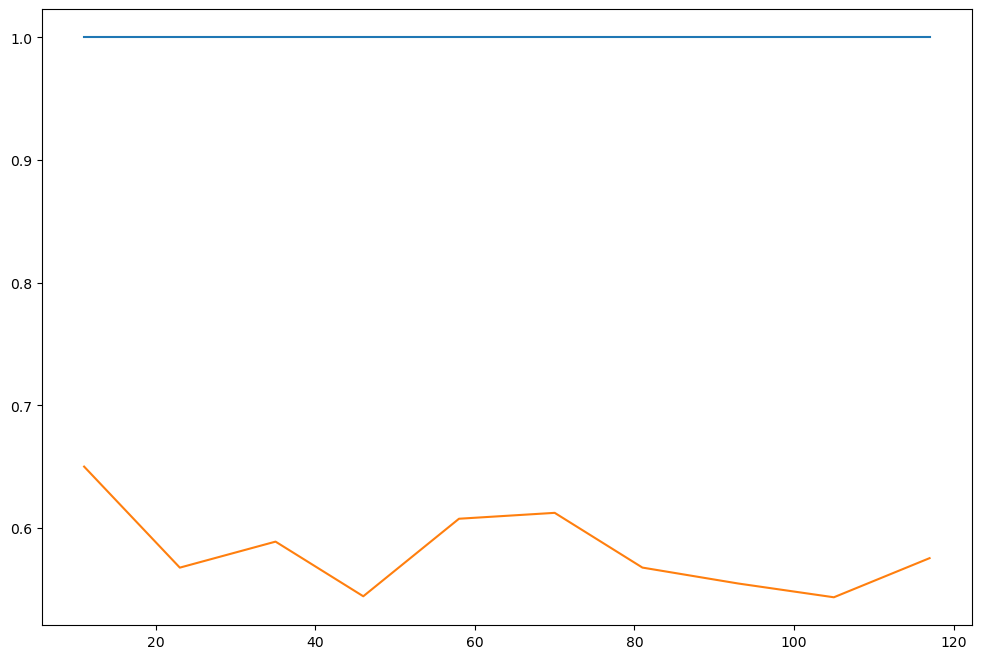

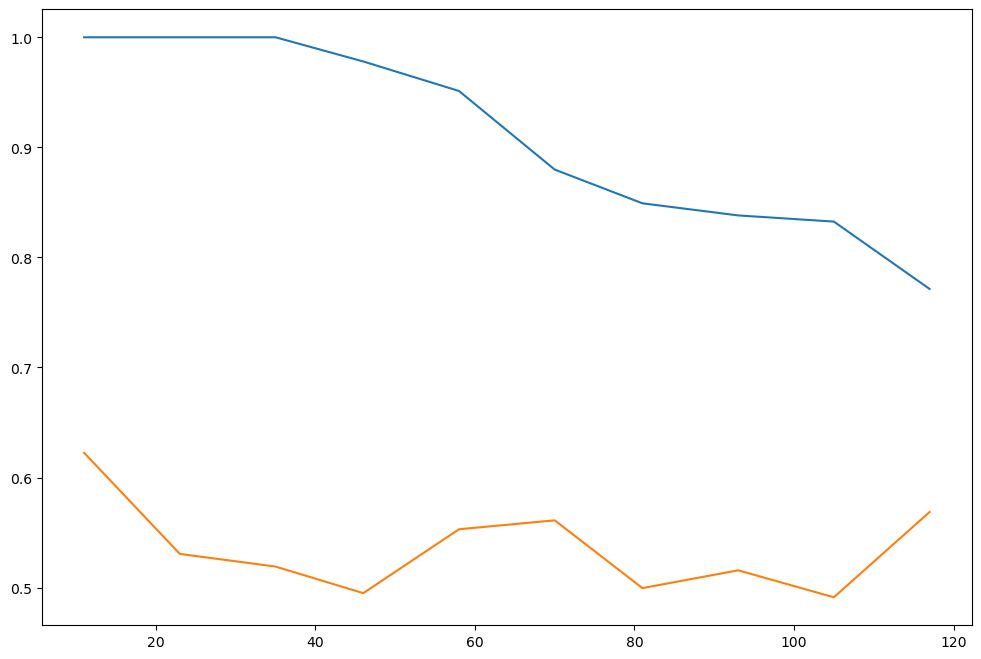

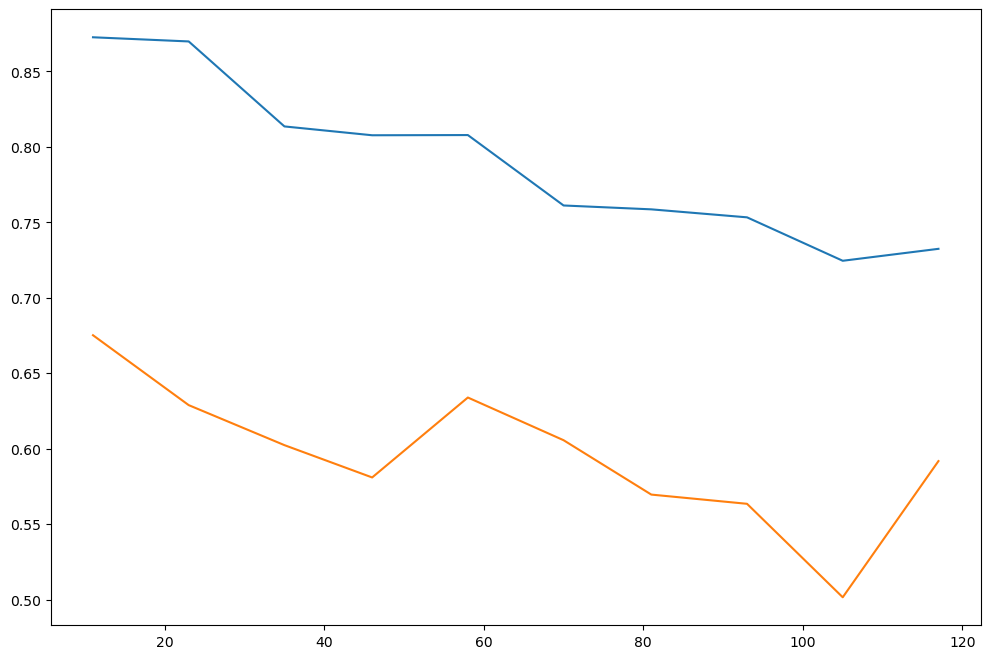

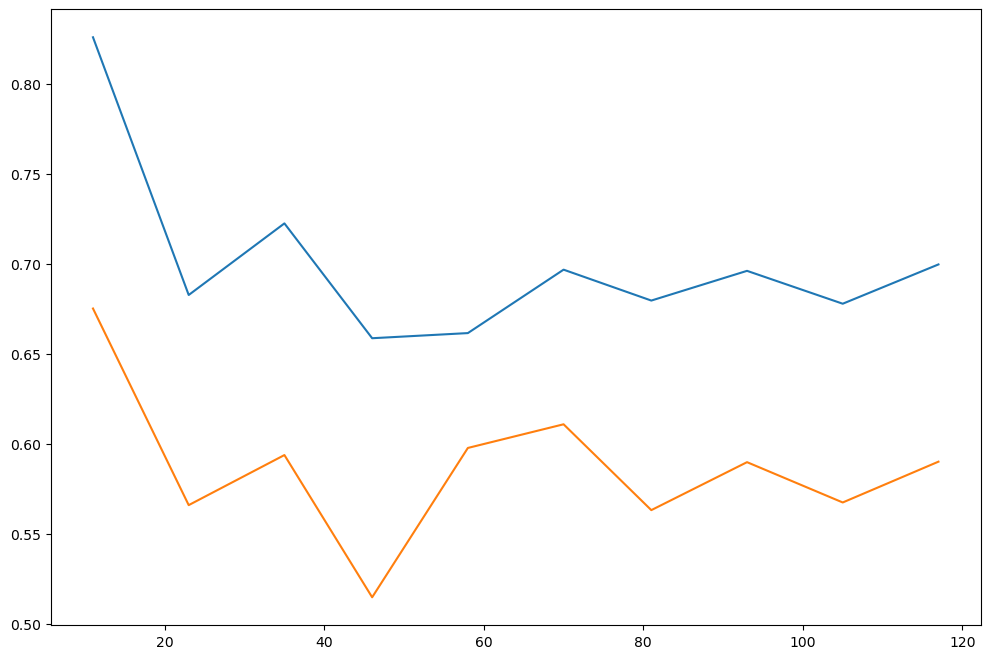

In [33]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

list_of_model = {
    'RandomForest' : RandomForest,
    'AdaBoost' : AdaBoost,
    'SVM': SVM,
    'KNN': KNN}

for name, model in list_of_model.items():
    print(name)
    evaluation(model)

In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [45]:
from sklearn import set_config
set_config(display = 'text')
set_config(print_changed_only = False)
print(AdaBoost)

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('selectkbest',
                                  SelectKBest(k='all',
                                              score_func=<function f_classif at 0x00000246BE102660>))],
                          verbose=False)),
                ('adaboostclassifier',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator='deprecated', estimator=None,
                                    learning_rate=1.0, n_estimators=50,
                                    random_state=0))],
         verbose=False)


In [46]:
SVM

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('selectkbest',
                                  SelectKBest(k='all',
                                              score_func=<function f_classif at 0x00000246BE102660>))],
                          verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=0, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)